In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.shape

(3501, 2)

In [6]:
#df.isnull()
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [7]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [8]:
df.Weight.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [9]:
#Descriptive statistics
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [10]:
x = df.Height
y = df.Weight

Text(0.5, 1.0, 'Height and Weight plt')

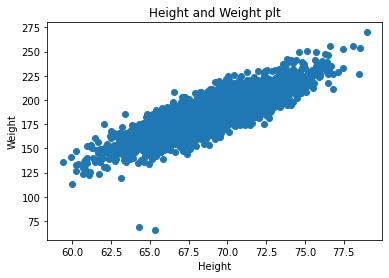

In [11]:
#Vizualization
plt.scatter(x , y) # x = df.Height , y = df.Weight
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and Weight plt')

In [12]:
x.mean()

69.02441087268781

In [13]:
y.mean()

186.891257979463

In [14]:
x = df[['Height']]
y = df['Weight']

In [15]:
x.shape

(3501, 1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70,random_state=1)

In [18]:
xtest.shape

(1051, 1)

In [19]:
ytest.shape

(1051,)

In [20]:
ytrain.shape

(2450,)

In [21]:
xtrain.shape

(2450, 1)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [25]:
m=lr.coef_

In [26]:
c=lr.intercept_
c

-225.8260300075584

In [27]:
x1 = 76.26
y = m*x1 + c

In [28]:
y

array([230.01426594])

In [29]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [30]:
lr.predict([[76.26]])

C:\Users\Md Bakhtiar Chowdhur\.conda\envs\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([230.01426594])

In [31]:
df['Predicted Values'] = lr.predict(x)

In [32]:
df.head(10)

,Height,Weight,Predicted Values
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
5,67.253016,152.212156,176.175472
6,68.785081,183.927889,185.333317
7,68.348516,167.971111,182.723767
8,67.018950,175.929440,174.776355
9,63.456494,156.399676,153.481956


In [33]:
lr.score(xtest , ytest)

0.7313258168853622

In [34]:
lr.score(xtrain , ytrain)

0.7327243206606743

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mse = mean_squared_error(df.Weight, df['Predicted Values'] )

In [37]:
mse

106.01097113124196

In [38]:
pred = lr.predict(xtest)
pred

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [39]:
mse = mean_squared_error(ytest, pred)
mse

110.8922151693238

In [40]:
pred2 = lr.predict(xtrain)
pred2

array([173.38945227, 163.86100911, 182.97238866, ..., 228.45987235,
       195.91437382, 194.20551648])

In [41]:
mse = mean_squared_error(ytrain, pred2) #training error
mse

103.91701705613013

Text(0.5, 1.0, 'Height Weight Plt')

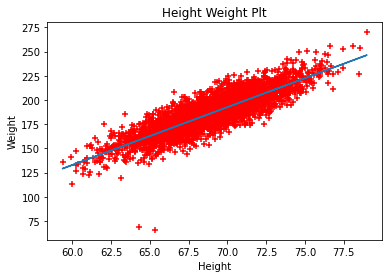

In [42]:
plt.plot(df.Height , lr.predict(x))
plt.scatter(df.Height , df.Weight, c ="red",marker='+')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height Weight Plt')

In [43]:
df.Height.mean()

69.02441087268781

In [44]:
df.Weight.mean()

186.891257979463